# ITMAL Exercise


REVISIONS|
---------|------------------------------------------------
2018-1219| CEF, initial.                  
2018-0207| CEF, updated.           
2018-0207| CEF, rewritten accuracy paradox section.           

## Performance Metrics

There are a number of frequently uses metrics in ML, namely accuracy, precision, recall and the $F_1$ score. All are called _metrics_ (though they are not true norms, like ${\cal L}_2$ or ${\cal L}_1$ we saw last time).

Maybe performance _score_ would be a better name than performance metric, at least for the accuracy, precision, recall we will be looking at---emphasising the conceptual distinction between the  _score-function_ and _cost(/loss/error/objective)-function_ (the later is typically a true distance/norm function).  


You can find a lot of details on say precision and recall in Wikipedia

>  https://en.wikipedia.org/wiki/Precision_and_recall


### Nomenclature

NAME           |   SYMBOL   | ALIAS
---------------| --------------------
true positives | $TP$ |
true negatives | $TN$ | 
false positives| $FP$ | type I error 
false negatives| $FN$ | type II error 

and $N = N_P + N_N$ being the total number of samples and the number of positive and negative samples
respectively.

### Precision

$$
\def\ba{\begin{array}{lll}}
\def\ea{\end{array}}
\newcommand{\rem}[1]{}
\newcommand{\subtext}[1]{_{\scriptsize{\mbox{#1}}}}
\newcommand{\st}[1]{\subtext{#1}}
\ba
 p &= \frac{TP}{TP + FP}
\ea
$$

### Recall or Sensitivity

$$
  \ba
    r &= \frac{TP}{TP + FN}\\
      &= \frac{TP}{TP + FN}\\ 
      &= \frac{TP}{N_P}
  \ea
$$

### Accuracy

$$
  \ba
      a &= \frac{TP + TN}{TP + TN + FP + FN}\\
        &= \frac{TP + TN}{N}\\
        &= \frac{TP + TN}{N_P + N_N} 
  \ea
$$

#### Accuracy Paradox

A static constant model, say $p\st{cancer}=0$ may have higher accuracy than a real model with predictive power. This is odd!

Asymmetric weight could also be associated with the false positive and false negative predictions, yielding either FP of FN much more expensive than the other. Say, it is more expensive not to treat a person with cancer, than treating a person without cancer. 

### F-score

General $\beta$-harmonic mean of the precision and recall 
$$
    F_\beta = (1+\beta^2) \frac{2pr}{\beta^2 p+r}\\
$$ 
that for say $\beta=2$ or $\beta=0.5$ shifts or skews the emphasis on the two variables in the equation. Normally only the $\beta=1$ harmonic mean is used

$$
  \ba
    F_1     &= \frac{2pr}{p+r}\\
            &=\frac{2}{1/p + 1/r}
  \ea
$$
with $F$ typically being synonymous with $F_1$. 

If needed, find more info on Wikipedia

> https://en.wikipedia.org/wiki/F1_score


## Confusion Matrix

For statistical classification, the confusion matrix or error matrix (or
matching matrix in unsupervised learning) is for a two-class problem given by
the $2\times2$ matrix with dimensions 'actual' and 'predicted'

$$   
{\bf M}\st{confusion} = 
\begin{array}{l|ll}
                           & \mbox{actual true} & \mbox{actual false} \\ \hline
    \mbox{predicted true}  & TP & FP \\     
    \mbox{predicted false} & FN & TN 
\end{array}
$$

The diagonal, in the square matrix, represent predicted values being the same
as the actual values, off-diagonal elements represent erroneous prediction.

For N-class classification the matrix gives a matrix with $N$ actual
classes and $N$ predicted classes

$$
{\bf M}\st{confusion} =
  \left[
  \begin{array}{llll}
       c_{11} & c_{12} & \cdots & c_{1n} \\ 
       c_{21} & c_{22} & \cdots & c_{2n} \\
       \vdots & \vdots & \ddots & \vdots \\
       c_{n1} & c_{n2} & \cdots & c_{nn} \\ 
  \end{array}
  \right]
$$
with say element $c_{21}$ being the number of actual classes '1' being predicted (erroneously) as class '2'.

### Nomenclature for the Confusion Matrix

The naming of the elements in the confusion matrix can be rather exotic, like _false omission rate_ (see the figure below), but we won't get to such detail here...let us stick with TP, TN, FP, FN and $F_1$!

<img src="Figs/performance_metrics.png" style="width:900px">

If you need more info on the confusion matrix:

>  https://en.wikipedia.org/wiki/Confusion_matrix

#### Qa Implement the Accuracy function and test it on the MNIST data.

Implement a general accuracy function `MyAccuracy`, that takes `y_pred` and `y_true` as input parameters.

Reuse your MNIST data loader and test the `MyAccuracy` function  both on your dummy classifier and on the Stochastic Gradient Descent classifier (with setup parameters as in [HOLM]).

In [1]:
# fetch once , takes long
from sklearn.datasets import fetch_openml
from sklearn.datasets import fetch_mldata
print('started')
X , y_true = fetch_openml('mnist_784', version=1, cache=True, return_X_y=True)
print('loaded')

started
loaded


In [2]:
from sklearn.base import BaseEstimator
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import numpy as np

clf = linear_model.SGDClassifier(max_iter=1000,tol=1e-3)

In [3]:
# TODO: Qa...
from sklearn.metrics import accuracy_score
print('started')

# X = X.reshape((X.shape[0],X.shape[1]*X.shape[2]))
X_train,X_test,y_train,y_test = train_test_split(X,y_true,test_size=0.2,shuffle=True)
y_train5 = (y_train == '5' ) # we only wish for one class not 10
y_test5 = (y_test == '5')
print ('split done')

class DummyClassifier(BaseEstimator):
    def fit(self,X, y=None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1), dtype=bool)

soren = DummyClassifier()    


soren.fit(X_train,y_train5)
y_pred = soren.predict(X_test)

print('søren fit')

clf.fit(X_train,y_train5)
y_pred_SGD = clf.predict(X_test)
print(y_pred_SGD)
print ('clf fit')
    
    

    


started
split done
søren fit
[False False False ... False False False]
clf fit


In [4]:
def PerformanceMeasure(y_pred, y_true):
    cm = confusion_matrix(y_pred,y_true)
    TP = cm[0][0]
    TN = cm[1][1]
    FP = cm[0][1]
    FN = cm[1][0]
    return TP, TN, FP, FN


In [5]:
import sys,os
sys.path.append(os.path.expanduser('..\\MachineLearning'))


from libitmal import utils as itmalutils
from sklearn.metrics import confusion_matrix

def MyAccuracy(y_pred, y_true):
    # TODO: you impl here
    TP, TN, FP, FN = PerformanceMeasure(y_pred, y_true)
    return ((TP + TN) / (TP + TN+FN + FP))


# TEST FUNCTION: compare with Scikit-learn accuracy_score
def TestAccuracy(y_pred, y_true):
    a0=MyAccuracy(y_pred, y_true)
    a1=accuracy_score(y_pred, y_true)
#
    print("\nmy a          =",a0)
    print("scikit-learn a=",a1)
#
    itmalutils.InRange(a0,a1)

print ('testing accuracy')    
TestAccuracy(y_pred,y_test5)
TestAccuracy(y_pred_SGD,y_test5)
print('done')

testing accuracy

my a          = 0.9101428571428571
scikit-learn a= 0.9101428571428571

my a          = 0.9682142857142857
scikit-learn a= 0.9682142857142857
done


#### Qb Implement Precision, Recall and $F_1$-score and test it on the MNIST data.

Now, implement the `MyPrecision`, `MyRecall` and `MyF1Score` functions, again taking MNIST as input, using the SGD and the Dummy classifiers and make some test vectors to compare to the functions found in Scikit-learn...

In [6]:
# TODO: Qb..

def MyPrecision(y_pred, y_true):
    TP, TN, FN,FP = PerformanceMeasure(y_pred,y_true)
    return TP/(TP+FP)

def MyRecall(y_pred, y_true):
    TP, TN, FN,FP = PerformanceMeasure(y_pred,y_true)
    return TP/(TP+FN)
    
def MyF1Score(y_pred, y_true):
    TP, TN, FN,FP = PerformanceMeasure(y_pred,y_true)
    return 2/((1/MyPrecision(y_pred, y_true))+(1/MyRecall(y_pred, y_true)))

# TODO: your test code here!
print('dummy precision' , MyPrecision(y_pred,y_test5))
print('SGD precision' , MyPrecision(y_pred_SGD,y_test5))

print('dummy Recall' , MyRecall(y_pred,y_test5))
print('SGD Recall' , MyRecall(y_pred_SGD,y_test5))

print('dummy f1' , MyF1Score(y_pred,y_test5))
print('SGD f1' , MyF1Score(y_pred_SGD,y_test5))

dummy precision 1.0
SGD precision 0.9950557212368545
dummy Recall 0.9101428571428571
SGD Recall 0.9707526223106959
dummy f1 0.9529578939495925
SGD f1 0.9827539433399215


#### Qc The Confusion Matrix

Revisit your solution to Qb in the `dummy_classifier.ipynb`. Did you manage to print the confusion matrix for both the Dummy and the SGD classifier?

I got the two confusion matrices

```
M_dummy=[[18166     0]
        [ 1834     0]]
   
M_SDG=[[17618   548]
      [  267  1567]]

```
your data may look similar (but not 100% equal). See if you can print the confusion matrix (some test code below for inspiration).

How are the Scikit-learn confusion matrix organized, where are the TP, FP, FN and TN located in the matrix indices, and what happens if you mess up the parameters calling

```python
confusion_matrix(y_train_pred, y_train_5)
```

instead of 
```python
confusion_matrix(y_train_5, y_train_pred)
```

Finally, compare the real and symmetric auto-covariance matrix, $\Sigma$, with the real but non-symmetric confusion matrix, $\mathbf{M}$. What does the diagonal represent in the covar- and confusion matrix respectively, and why is the covar- symmetric, but the confusion not? 

In [18]:
# TODO: Qc

# TEST CODE: some demo code to produce a 'test' confusion matrix using the SGD model 
import matplotlib.pyplot as plt

M=confusion_matrix(y_pred_SGD,y_test5)
itmalutils.PrintMatrix(M,"M=")




M=[[12679   382]
   [   63   876]]


#### Qd A Confusion Matrix Heat-map

Generate a _heat map_ image for the confusion matrices, `M_dummy` and `M_SGD` respectively, getting inspiration from [HOML], pp96-97.

This heat map could be an important guide for you when analysing multiclass data in the future.

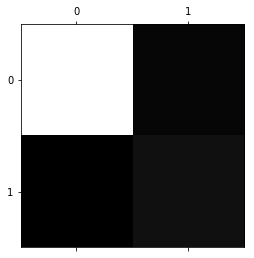

In [17]:
# TODO: Qd
plt.matshow(M,cmap=plt.cm.gray)
plt.show() # her ses det flest TP, hvilket giver god mening når det 5 og ikke 5

#### Qe Run a classifier on your data

Finally, try to run a classifier on the data-set you selected previously, perhaps starting with the SGD.

Is it possible to classify at all on your data, or do we need regression instead?

Are you able to do supervised learning, or are there no obvious `y_true` data in your set at all?

If your data is in the form, where you are able to do supervised-classification, could you produce a confusion matrix heatmap, then?

In [19]:
# TODO: Qe...
type(M)

numpy.ndarray